## Receiving directionality

(acoustics-receiver_plane_wave_approx)=
### Plane wave approximation

DISCUSSION PLANE WAVE APPROXIMATION!


### Directionality

While we often refer to hydrophones as points in the ocean, they all have a physical shape and size. This means that sound is not captured at a single point, but rather across a collection of sound-transducing elements on the hydrophone. As a result, every hydrophone has a certain _directionality_, or _beampattern_, which describes how the received sound level varies depending on the direction of incoming sound relative to the hydrophone. Depending on the application, sometimes we want an "omnidirectional" hydrophone that receives sound equally from all directions; at other times, we may want hydrophones that have a strong directionality, such that we can capture sound from a specific direction more clearly. 

Directionality arises because sound waves arriving at different parts of a receiver capture slightly different versions of the same sound. When these signals are combined, they create constructive and destructive interference depending on the sound direction.

We can see this clearly using widget below, showing signals received by each of the two elements of a receiver _array_ and their combined output. Depending where the direction of incoming sound and its frequency, the differences between the two signals can significantly affect the amplitude of their sum, giving rise to the directionality.

In [2]:
# ADD WIDGET
# - FIX 2 ELEMENTS
# - VARY: SOUND FREQUENCY
# - VARY: SOUND SOURCE DIRECTION: PLOT ON THE RIGHT AS AN ARROW
# - PLOT 2 RECEIVED SIGNALS ON THE LEFT OF ELEMENT
# - PLOT THE SUM OF THE SIGNALS BELOW THE INDIVIDUAL SIGNAL
# - PLOT A VERTICAL GRAPH ON THE RIGHT SHOWING RMS OR PEAK AMPLITUDE VS ANGLE, WITH A POINT INDICATING THE CURRENT SOURCE DIRECTION


In [1]:
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ipywidgets as widgets

from IPython.display import display

In [59]:
r = 1  # viz source circle radius
d = 0.5  # element spacing
c = 1500  # sound speed
freq = 1000
t = np.linspace(0, 0.01, 1000)
angle_rad_all = np.deg2rad(np.arange(-90, 91, 1))
phase_shift_all = d * np.sin(angle_rad_all) / (c/freq) * 2 * np.pi
y = np.sin(2 * np.pi * freq * t)
y1_all = np.sin(np.tile(2 * np.pi * freq * t, (phase_shift_all.size,1))
                - np.tile(phase_shift_all, (t.size, 1)).T)
y_sum_all = (y + y1_all).max(axis=1)

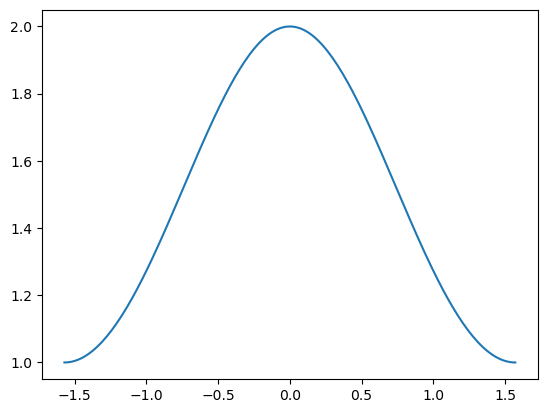

In [61]:
plt.plot(angle_rad_all, y_sum_all)

In [75]:
COLOR = ["C0", "C1"]

def update_2_rcvr(angle, freq):
    
    angle_rad = np.deg2rad(angle)
    r = 1  # viz source circle radius
    d = 0.5  # element spacing
    c = 1500  # sound speed
    t = np.linspace(0, 0.01, 1000)
    y = np.sin(2 * np.pi * freq * t)
    phase_shift = d * np.sin(angle_rad) / (c/freq) * 2 * np.pi
    y1 = np.sin(2 * np.pi * freq * t - phase_shift)

    # beampattern across angle
    angle_all = np.arange(-90, 91, 1)
    angle_rad_all = np.deg2rad(angle_all)
    phase_shift_all = d * np.sin(angle_rad_all) / (c/freq) * 2 * np.pi
    y = np.sin(2 * np.pi * freq * t)
    y1_all = np.sin(np.tile(2 * np.pi * freq * t, (phase_shift_all.size,1))
                    - np.tile(phase_shift_all, (t.size, 1)).T)
    y_sum_all = (y + y1_all).max(axis=1)

    # PLOTS
    fig = plt.figure(figsize=(10, 3))
    gs = gridspec.GridSpec(1, 3, width_ratios=[4, 4, 2], wspace=0.2) 
    gs_signals = gridspec.GridSpecFromSubplotSpec(
        2, 1, height_ratios=[2,1], subplot_spec=gs[0, 1], hspace=0.8)

    # elements and source angle
    map_ax = plt.subplot(gs[0, 0])
    map_ax.plot(r*np.cos(angle_rad), r*np.sin(angle_rad), "ro",
                markerfacecolor="none", label="Source")
    map_ax.plot(0, d/10, f"{COLOR[0]}o", markersize=3)
    map_ax.plot(0, -d/10, f"{COLOR[1]}o", markersize=3)
    map_ax.set_xlim(-1.2, 1.2)
    map_ax.set_ylim(-1.2, 1.2)
    map_ax.axis("off")
    # map_ax.axis("equal")

    # individual received signal
    indiv_ax = plt.subplot(gs_signals[0])
    indiv_ax.plot(t*1e3, y, COLOR[0])
    indiv_ax.plot(t*1e3, y1 + 1, COLOR[1])
    indiv_ax.set_xlim(0, 10)

    # summed received signal
    sum_ax = plt.subplot(gs_signals[1])
    sum_ax.plot(t*1e3, y+y1, "k")
    sum_ax.set_xlim(0, 10)
    sum_ax.set_ylim(-2.1, 2.1)

    # beampattern
    gs_beam_pattern = gridspec.GridSpecFromSubplotSpec(
        1, 1, subplot_spec=gs[0, 2], hspace=0.8)
    bp_ax = plt.subplot(gs_beam_pattern[0])
    bp_ax.plot(y_sum_all, angle_all, "k")
    bp_ax.plot((y+y1).max(), angle, "ro", markerfacecolor="w")
    bp_ax.set_xlim(0, 2.1)
    bp_ax.set_ylim(-90, 90)
    bp_ax.set_yticks(np.arange(-90, 91, 30))

    plt.show()


angle_slider = widgets.IntSlider(
    value=0, min=-90, max=90, step=1,
    description="Angle (°)",
    continuous_update=True,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width="600px")
)

freq_slider = widgets.IntSlider(
    value=1000, min=100, max=2000, step=1, 
    description="Frequency (Hz)", 
    continuous_update=True, 
    style={'description_width': 'initial'}, 
    layout=widgets.Layout(width="600px")
)

interactive_plot = widgets.interactive(
    update_2_rcvr, angle=angle_slider, freq=freq_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='Angle (°)', layout=Layout(width='600px'), max=90, min=-9…

In [2]:
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import ipywidgets as widgets
from matplotlib.lines import Line2D

from IPython.display import display

GRID_SIZE = 2000
CIRCLE_RADIUS = 400
SOUND_SPEED_WATER = 1500
TIME_RECEIVED_AT_RN = 1
COLOR_CYCLE = plt.rcParams['axes.prop_cycle'].by_key()['color']
N = 2

def simulate_N_receivers(angle_deg, frequency, spacing):
    rN_x = np.zeros(N)
    rN_y = np.linspace(-spacing * (N - 1) / 2, spacing * (N - 1) / 2, N)
    if N==1:
        trace_offsets = np.array([0])
    else:
        trace_offsets = 2.5e-4 * np.linspace(-0.1, 0.1, N)

    sampling_rate = min(10000, int(1000*(10**(np.floor(np.log10(frequency))))))
    t = np.linspace(0, 4, sampling_rate*4)
    signal = np.sin(t*2*np.pi*frequency)
    plot_duration = 2*(10**(-np.floor(np.log10(frequency))))
    signal_duration = 2.5*(10**(-np.floor(np.log10(frequency))))

    angle_degrees = np.arange(-90, 90)
    angle_idx = np.where(np.isclose(angle_degrees, angle_deg, atol=1e-2))[0][0]
    angle_radians = np.radians(angle_degrees)
    circle_x_arr = CIRCLE_RADIUS * np.cos(angle_radians)
    circle_y_arr = CIRCLE_RADIUS * np.sin(angle_radians)
    circle_x = circle_x_arr[angle_idx]
    circle_y = circle_y_arr[angle_idx]

    dist_from_source_to_r_n_arr = np.sqrt((circle_x_arr[None, :] - rN_x[:, None]) ** 2 + (circle_y_arr[None, :] - rN_y[:, None]) ** 2)

    time_to_rn_array = dist_from_source_to_r_n_arr / SOUND_SPEED_WATER
    receive_signaln_for_degrees = signal[:, None, None] / (dist_from_source_to_r_n_arr[None, :, :] ** 2)
    signal_duration_samples = np.arange(int(signal_duration * sampling_rate))
    rn_indices = ((TIME_RECEIVED_AT_RN - time_to_rn_array) * sampling_rate).astype(int) + signal_duration_samples[:, None, None]
    chunk_of_received_signaln_in_window_degrees = np.take_along_axis(receive_signaln_for_degrees, rn_indices, axis=0)

    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[4, 4, 2], wspace=0.3) 
    gs_signals = gridspec.GridSpecFromSubplotSpec(2, 1, height_ratios=[2,1], subplot_spec=gs[0, 1], hspace=0.8)
    map_ax = plt.subplot(gs[0, 0])
    map_ax.scatter(circle_x, circle_y, edgecolors='red', facecolors='none', linewidths=2, s=50, label=f"Source")

    received_ax = plt.subplot(gs_signals[0])
    map_ax.scatter(rN_x, rN_y, s=10, c=COLOR_CYCLE[:N])
    received_ax.plot(1000*(np.tile(signal_duration_samples / sampling_rate, (N, 1)).T), chunk_of_received_signaln_in_window_degrees[:,:,angle_idx]+trace_offsets)
    marker_handles = [Line2D([0], [0], marker='o', color='w', label=f'rcvr #{i+1}', markerfacecolor=COLOR_CYCLE[i], markersize=6) for i in range(N)]
    line_handles = [Line2D([0], [0], label=f'rcvr #{i+1}', color=COLOR_CYCLE[i]) for i in range(N)]

    map_ax.set_xlim(-GRID_SIZE / 2, GRID_SIZE / 2)
    map_ax.set_ylim(-GRID_SIZE / 2, GRID_SIZE / 2)
    map_ax.set_xlabel("X (meters)")
    map_ax.set_ylabel("Y (meters)")
    map_ax.set_title(f"Sound Reception ({int(N)} receivers; 1 source)")
    map_ax.legend(handles=marker_handles, ncol=3, loc='upper right')

    received_ax.set_xlabel("Time (ms)")
    received_ax.set_ylabel("Amplitude")
    received_ax.set_title("Received voltage signals")
    received_ax.grid(which='both')
    received_ax.set_yticks([], [])
    received_ax.set_xlim(0, 1000*(plot_duration))
    received_ax.set_ylim(-1e-4, 1e-4)
    received_ax.legend(handles=line_handles, ncol=3, loc='upper right')

    summed_signal_degrees = np.sum(chunk_of_received_signaln_in_window_degrees, axis=1)
    vrms_summed = np.sqrt(np.mean(np.square(summed_signal_degrees), axis=0))
    vrms_summed_dB = 20*np.log10(vrms_summed)
    vrms_summed_dB_norm = vrms_summed_dB - vrms_summed_dB.max()

    summed_signal = summed_signal_degrees[:, angle_idx]
    vrms_summed_fixed = vrms_summed[angle_idx]
    vrms_summed_fixed_dB = 20*np.log10(vrms_summed_fixed)
    vrms_summed_fixed_dB_norm = vrms_summed_fixed_dB - vrms_summed_dB.max()

    summed_ax = plt.subplot(gs_signals[1])
    summed_ax.plot(1000*(signal_duration_samples / sampling_rate), summed_signal, 'k')
    summed_ax.set_xlabel("Time (ms)")
    summed_ax.set_ylabel("Amplitude")
    summed_ax.set_title("Summed voltage signal")
    summed_ax.set_yticks([], [])
    summed_ax.grid(which='both')
    summed_ax.set_xlim(0, 1000*plot_duration)
    summed_ax.set_ylim(-5e-5, 5e-5)

    gs_beam_pattern = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0, 2], hspace=0.8)
    beam_pattern_ax = plt.subplot(gs_beam_pattern[0])
    beam_pattern_ax.set_title(f'Beam pattern')
    beam_pattern_ax.plot(vrms_summed_dB_norm, angle_degrees, color='k')
    beam_pattern_ax.scatter(vrms_summed_fixed_dB_norm, angle_deg, edgecolors='red', facecolors='w', linewidth=2, zorder=2)
    beam_pattern_ax.set_xlim(-40, 1)
    beam_pattern_ax.grid(which='both')
    beam_pattern_ax.set_xlabel(r'dB$V_{rms}$ (dB)')
    beam_pattern_ax.set_ylabel('Angle (°)')

    plt.show()


angle_slider = widgets.IntSlider(
    value=0, min=-90, max=90, step=1, description="Angle (°)", continuous_update=True, style={'description_width': 'initial'}, layout=widgets.Layout(width="1000px")
)

freq_slider = widgets.IntSlider(
    value=10, min=1, max=2e2, step=1, description="Frequency (Hz)", continuous_update=True, style={'description_width': 'initial'}, layout=widgets.Layout(width="1000px")
)

spacing_slider = widgets.IntSlider(
    value=40, min=10, max=100, step=1, description="Spacing (m)", continuous_update=True, style={'description_width': 'initial'}, layout=widgets.Layout(width="1000px")
)

interactive_plot = widgets.interactive(simulate_N_receivers, angle_deg=angle_slider, frequency=freq_slider, spacing=spacing_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='Angle (°)', layout=Layout(width='1000px'), max=90, min=-…

The directionality also changes depending on the number of elements in the compounded receiver:


In [3]:
# ADD WIDGET
# - N ELEMENTS (VARIABLE)
# - VARY: ELEMENT SPACING
# - VARY: FREQUENCY
# - PLOT SOUND SOURCE DIRECTION ON THE RIGHT AS AN ARROW
# - PLOT THE SUM OF THE SIGNALS BELOW THE INDIVIDUAL SIGNAL
# - PLOT A VERTICAL GRAPH ON THE RIGHT SHOWING RMS OR PEAK AMPLITUDE VS ANGLE, WITH A POINT INDICATING THE CURRENT SOURCE DIRECTION


In [ ]:
GRID_SIZE = 2000
CIRCLE_RADIUS = 400
SOUND_SPEED_WATER = 1500
TIME_RECEIVED_AT_RN = 1
COLOR_CYCLE = plt.rcParams['axes.prop_cycle'].by_key()['color']

def simulate_N_receivers(angle_deg, frequency, N, spacing):
    rN_x = np.zeros(N)
    rN_y = np.linspace(-spacing * (N - 1) / 2, spacing * (N - 1) / 2, N)
    if N==1:
        trace_offsets = np.array([0])
    else:
        trace_offsets = 2.5e-4 * np.linspace(-0.1, 0.1, N)

    sampling_rate = min(10000, int(1000*(10**(np.floor(np.log10(frequency))))))
    t = np.linspace(0, 4, sampling_rate*4)
    signal = np.sin(t*2*np.pi*frequency)
    plot_duration = 2*(10**(-np.floor(np.log10(frequency))))
    signal_duration = 2.5*(10**(-np.floor(np.log10(frequency))))

    angle_degrees = np.arange(-90, 90)
    angle_idx = np.where(np.isclose(angle_degrees, angle_deg, atol=1e-2))[0][0]
    angle_radians = np.radians(angle_degrees)
    circle_x_arr = CIRCLE_RADIUS * np.cos(angle_radians)
    circle_y_arr = CIRCLE_RADIUS * np.sin(angle_radians)
    circle_x = circle_x_arr[angle_idx]
    circle_y = circle_y_arr[angle_idx]

    dist_from_source_to_r_n_arr = np.sqrt((circle_x_arr[None, :] - rN_x[:, None]) ** 2 + (circle_y_arr[None, :] - rN_y[:, None]) ** 2)

    time_to_rn_array = dist_from_source_to_r_n_arr / SOUND_SPEED_WATER
    receive_signaln_for_degrees = signal[:, None, None] / (dist_from_source_to_r_n_arr[None, :, :] ** 2)
    signal_duration_samples = np.arange(int(signal_duration * sampling_rate))
    rn_indices = ((TIME_RECEIVED_AT_RN - time_to_rn_array) * sampling_rate).astype(int) + signal_duration_samples[:, None, None]
    chunk_of_received_signaln_in_window_degrees = np.take_along_axis(receive_signaln_for_degrees, rn_indices, axis=0)

    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[4, 4, 2], wspace=0.3) 
    gs_signals = gridspec.GridSpecFromSubplotSpec(2, 1, height_ratios=[2,1], subplot_spec=gs[0, 1], hspace=0.8)
    map_ax = plt.subplot(gs[0, 0])
    map_ax.scatter(circle_x, circle_y, edgecolors='red', facecolors='none', linewidths=2, s=50, label=f"Source")

    received_ax = plt.subplot(gs_signals[0])
    map_ax.scatter(rN_x, rN_y, s=10, c=COLOR_CYCLE[:N])
    received_ax.plot(1000*(np.tile(signal_duration_samples / sampling_rate, (N, 1)).T), chunk_of_received_signaln_in_window_degrees[:,:,angle_idx]+trace_offsets)
    marker_handles = [Line2D([0], [0], marker='o', color='w', label=f'rcvr #{i+1}', markerfacecolor=COLOR_CYCLE[i], markersize=6) for i in range(N)]
    line_handles = [Line2D([0], [0], label=f'rcvr #{i+1}', color=COLOR_CYCLE[i]) for i in range(N)]

    map_ax.set_xlim(-GRID_SIZE / 2, GRID_SIZE / 2)
    map_ax.set_ylim(-GRID_SIZE / 2, GRID_SIZE / 2)
    map_ax.set_xlabel("X (meters)")
    map_ax.set_ylabel("Y (meters)")
    map_ax.set_title(f"Sound Reception ({int(N)} receivers; 1 source)")
    map_ax.legend(handles=marker_handles, ncol=3, loc='upper right')

    received_ax.set_xlabel("Time (ms)")
    received_ax.set_ylabel("Amplitude")
    received_ax.set_title("Received voltage signals")
    received_ax.grid(which='both')
    received_ax.set_yticks([], [])
    received_ax.set_xlim(0, 1000*(plot_duration))
    received_ax.set_ylim(-1e-4, 1e-4)
    received_ax.legend(handles=line_handles, ncol=3, loc='upper right')

    summed_signal_degrees = np.sum(chunk_of_received_signaln_in_window_degrees, axis=1)
    vrms_summed = np.sqrt(np.mean(np.square(summed_signal_degrees), axis=0))
    vrms_summed_dB = 20*np.log10(vrms_summed)
    vrms_summed_dB_norm = vrms_summed_dB - vrms_summed_dB.max()

    summed_signal = summed_signal_degrees[:, angle_idx]
    vrms_summed_fixed = vrms_summed[angle_idx]
    vrms_summed_fixed_dB = 20*np.log10(vrms_summed_fixed)
    vrms_summed_fixed_dB_norm = vrms_summed_fixed_dB - vrms_summed_dB.max()

    summed_ax = plt.subplot(gs_signals[1])
    summed_ax.plot(1000*(signal_duration_samples / sampling_rate), summed_signal, 'k')
    summed_ax.set_xlabel("Time (ms)")
    summed_ax.set_ylabel("Amplitude")
    summed_ax.set_title("Summed voltage signal")
    summed_ax.set_yticks([], [])
    summed_ax.grid(which='both')
    summed_ax.set_xlim(0, 1000*plot_duration)
    summed_ax.set_ylim(-5e-5, 5e-5)

    gs_beam_pattern = gridspec.GridSpecFromSubplotSpec(1, 1, subplot_spec=gs[0, 2], hspace=0.8)
    beam_pattern_ax = plt.subplot(gs_beam_pattern[0])
    beam_pattern_ax.set_title(f'Beam pattern')
    beam_pattern_ax.plot(vrms_summed_dB_norm, angle_degrees, color='k')
    beam_pattern_ax.scatter(vrms_summed_fixed_dB_norm, angle_deg, edgecolors='red', facecolors='w', linewidth=2, zorder=2)
    beam_pattern_ax.set_xlim(-40, 1)
    beam_pattern_ax.grid(which='both')
    beam_pattern_ax.set_xlabel(r'dB$V_{rms}$ (dB)')
    beam_pattern_ax.set_ylabel('Angle (°)')

    plt.show()


angle_slider = widgets.IntSlider(
    value=0, min=-90, max=90, step=1, description="Angle (°)", continuous_update=True, style={'description_width': 'initial'}, layout=widgets.Layout(width="1000px")
)

freq_slider = widgets.IntSlider(
    value=10, min=1, max=2e2, step=1, description="Frequency (Hz)", continuous_update=True, style={'description_width': 'initial'}, layout=widgets.Layout(width="1000px")
)

N_slider = widgets.IntSlider(
    value=2, min=2, max=10, step=1, description="# receivers", continuous_update=True, style={'description_width': 'initial'}, layout=widgets.Layout(width="300px")
)

spacing_slider = widgets.IntSlider(
    value=40, min=10, max=100, step=1, description="Spacing (m)", continuous_update=True, style={'description_width': 'initial'}, layout=widgets.Layout(width="1000px")
)

interactive_plot = widgets.interactive(simulate_N_receivers, angle_deg=angle_slider, frequency=freq_slider, N=N_slider, spacing=spacing_slider)
display(interactive_plot)

interactive(children=(IntSlider(value=0, description='Angle (°)', layout=Layout(width='1000px'), max=90, min=-…

In [4]:
# HERE WE CAN EASILY LINK TO IN-DEPTH MATERIALS TO EXPLAIN MORE USING EQUATIONS

```{Tip}
:class: tip
Now you have the intuition of where receiving directionality comes about and what happens when the number of receiving elements changes. You will soon see how the same concept applies on [acoustic sources](acoustics-source)!
```